In [10]:
import inclconf

inclconf.configure_includepath()

PLAYGROUND = inclconf.PROJECT_DIRECTORY / "data" / "playground"

In [11]:
from src.fusion_detector import misc, datasource
import torchvision.transforms.functional as V


x, label = datasource.CifarBatchDataSource(8).batch()
lst = misc.SegmentedSerializableList(PLAYGROUND, "rafic", 5)

for i in range(x.shape[0]):
    image = V.to_pil_image(
        misc.denormalize(x[i].unsqueeze(0), datasource.CIFAR_MEAN, datasource.CIFAR_STD).squeeze()
    )
    category = label[i].item()
    lst.add((image, category))
lst.save()

8


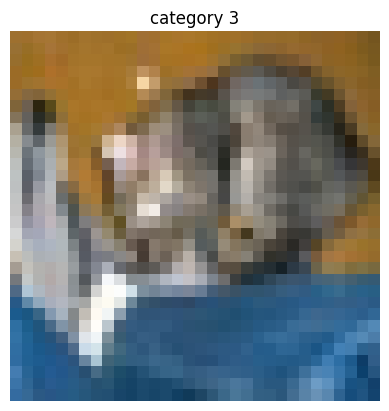

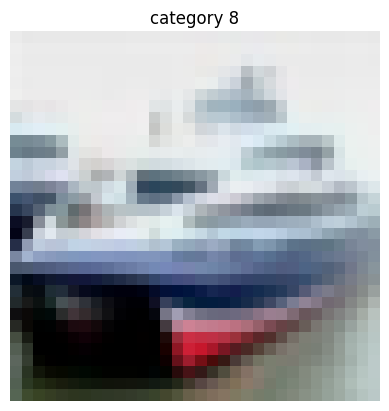

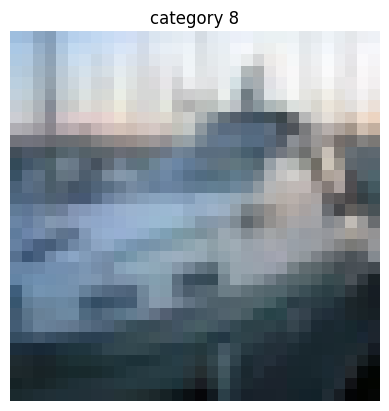

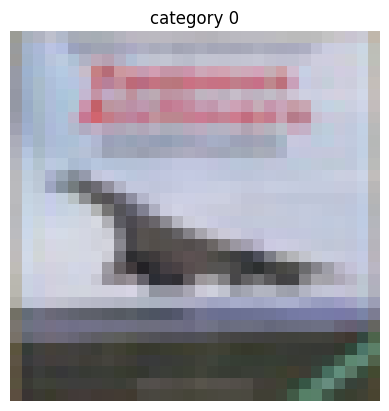

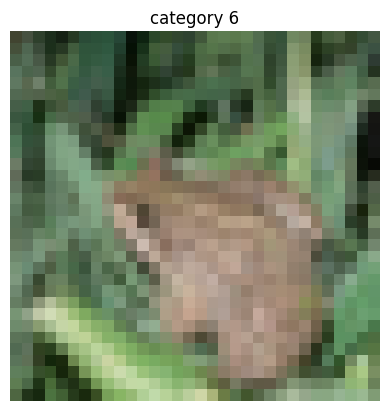

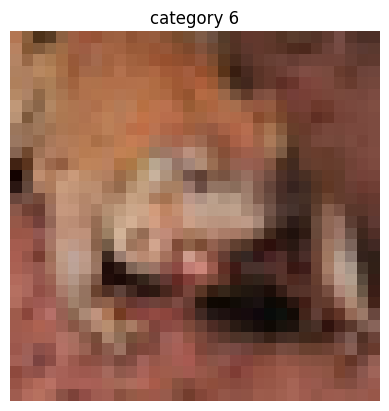

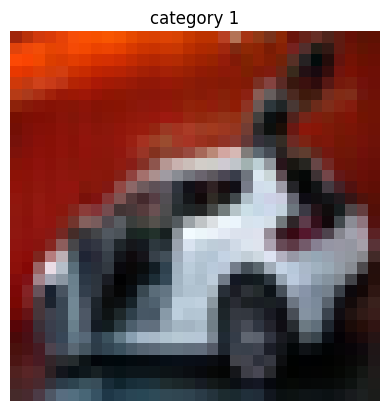

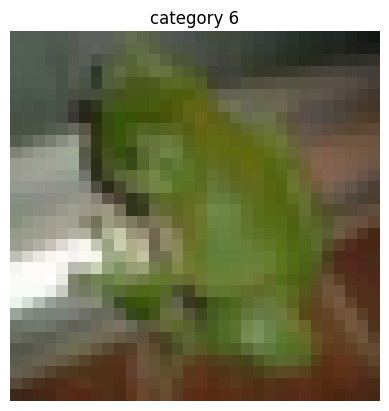

In [12]:
import matplotlib.pyplot as plt

immutable = misc.SegmentedSerializableList(PLAYGROUND, "rafic")
print(len(immutable))
for item in immutable:
    image, category = item
    plt.title(f"category {category}")
    plt.axis("off")
    plt.imshow(image)
    plt.show()